In [1]:
%pylab inline
%matplotlib inline
import io
import h5py 
import pandas as pd
import scipy as sp
import numpy as np
from PIL import Image
from fractions import Fraction

from scipy import optimize 
from scipy.optimize import curve_fit,least_squares
from lmfit.models import GaussianModel
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colorbar import ColorbarBase, make_axes_gridspec


Populating the interactive namespace from numpy and matplotlib


    ##  

In [159]:
volume = 199.7
mass = volume/(2.54**3)
width = np.arange(1,1.8,0.1)
width[3]=1.25
length = double( mass/width**2)
for i in range(len(length)):
    print('{:>17.15f}'.format(length[i]),'\t','{:.2f}'.format(width[i]))

12.186441695718035 	 1.00
10.071439417948786 	 1.10
8.462806733137521 	 1.20
7.799322685259543 	 1.25
6.217572293733688 	 1.40
5.416196309208012 	 1.50
4.760328787389854 	 1.60
4.216761832428383 	 1.70


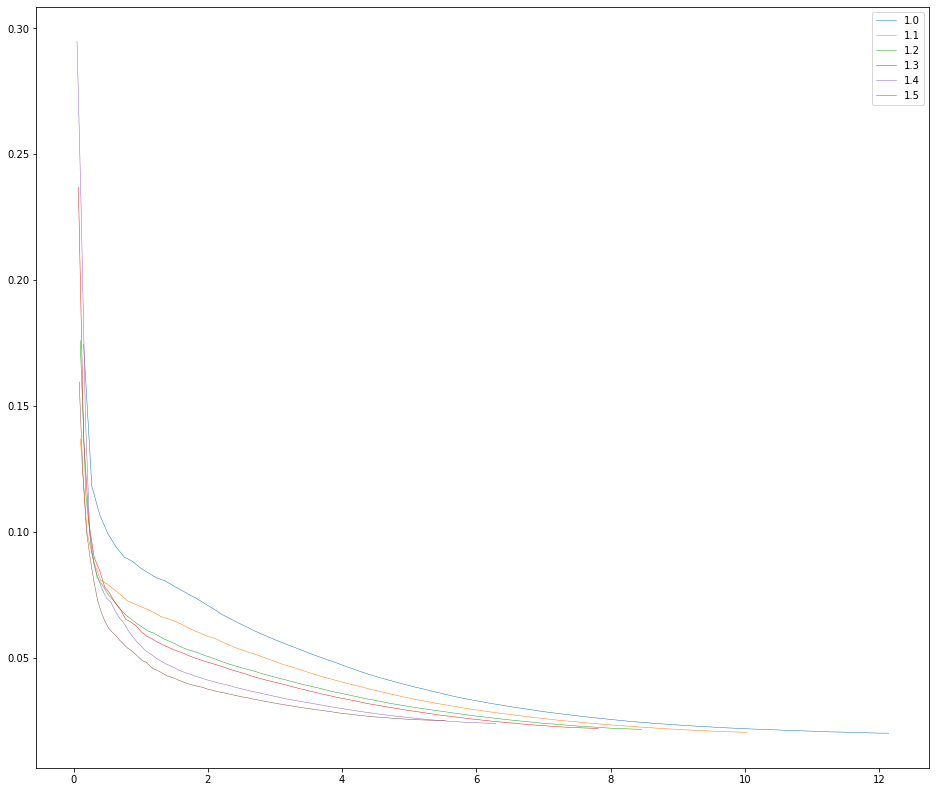

In [171]:

lengths = 6
Angles = lengths
fileName = [[] for i in range((Angles))]
dfs = []
numpydf = []
position = []
distance = []
for i in range(Angles):
    prefix1 = 'constant_volume_200/build-constant_volume/LXe_200_gram_0_nt_'  
    i=i
    csv ='.csv'
    
    fileName[i].append(f'{prefix1}{i}{csv}')
    dfs.append(pd.read_csv(fileName[i][0], sep=',',header=None, skiprows=range(0,10),
                           names=('Energy Deposited', 'SiPM Hits', 'Photons',
                                 'x_pos','y_pos','z_pos')))  
    dfs[i]['LCE']=dfs[i]['SiPM Hits']/dfs[i]['Photons']
    dfs[i]['log(LCE)']=log(dfs[i]['SiPM Hits']/dfs[i]['Photons'])
    numpydf.append(dfs[i].to_numpy())
    position.append(numpydf[i][:,3:6])
    position[i][:,2]=position[i][:,2]-min(position[i][:,2])
    position[i]= position[i]/25.4
    distance.append(sqrt(sum(position[i]**2,axis=1)))
    dfs[i]['z_pos'] = position[i][:,2].tolist()
    dfs[i]['y_pos'] = position[i][:,1].tolist()
    dfs[i]['x_pos'] = position[i][:,0].tolist()
    dfs[i]['Distance'] = distance[i].tolist()
    
energy_deposit_threshold = 0.0
photon_threshold = 0
SiPM_hit_threshold = 0
LCE_threshold = 0
distance_threshold =  0 #inch
for i in range(len(dfs)): 
    dfs[i] = dfs[i][dfs[i]['Energy Deposited']>=energy_deposit_threshold]
    dfs[i] = dfs[i][dfs[i]['Photons']>=photon_threshold]
    dfs[i] = dfs[i][dfs[i]['LCE']>=LCE_threshold]
    dfs[i] = dfs[i][dfs[i]['SiPM Hits']>=SiPM_hit_threshold]
    dfs[i] = dfs[i][dfs[i]['Distance']>=distance_threshold]    
bins = 100
mins = np.zeros((Angles))
maxs = np.zeros((Angles))
bes = np.zeros((Angles,bins+1))
bcs = np.zeros((Angles,bins))
for i in range(Angles):
    mins[i]= np.min(distance[i])
    maxs[i]= np.max(distance[i])
    bes[i,:] = np.linspace(mins[i],maxs[i],bins+1)
    bcs[i,:] = bes[i,:-1] + np.diff(bes[i,:]) / 2.

average = np.zeros((Angles,bins))
for j in range(Angles):
    arraY = distance[j]
    for i in range(bins):
        msk = arraY>=bes[j,i] 
        mask = arraY<bes[j,i+1]
        mk = msk = mask
        average[j,i] = dfs[j]['LCE'][mk].mean()
plt.figure(figsize=(16,14))
for i in range(Angles):    
    plot(bcs[i],average[i],label='1.{}'.format(i),lw=0.5)
#     plot(bcs_[i],average_[i],label='1.{} reduced clarity'.format(i),lw=0.5)
legend()   

show()    

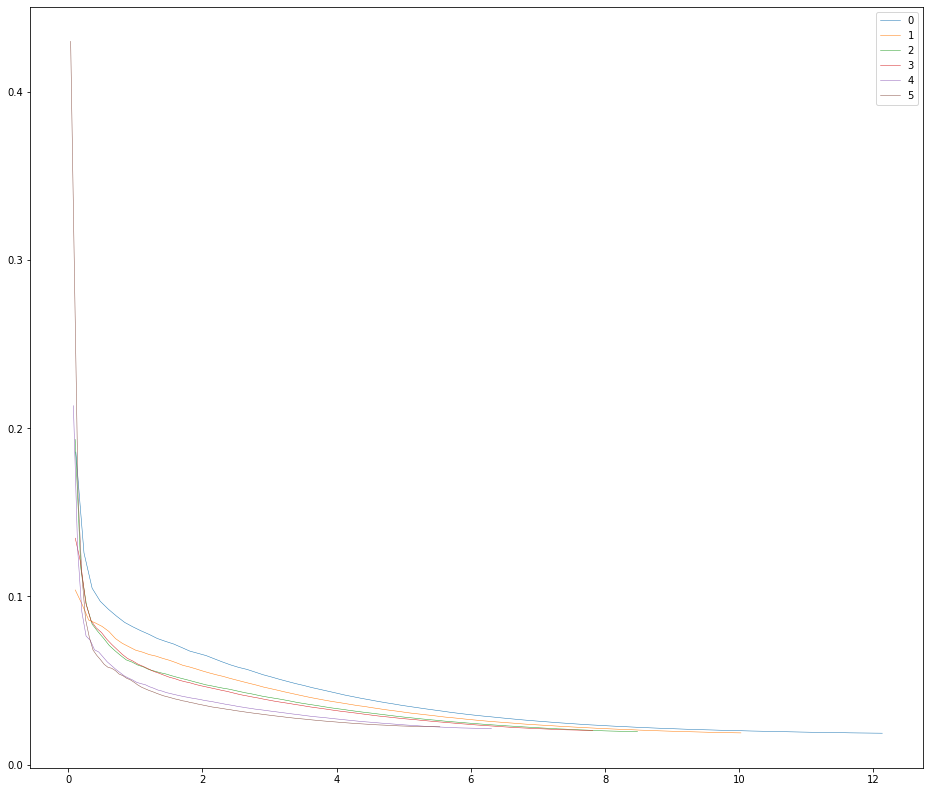

In [172]:


Angles = lengths
fileName = [[] for i in range((Angles))]
dfs = []
numpydf = []
position = []
distance = []
for i in range(Angles):
    prefix1 = 'constant_volume_200/build-constant_volume/LXe_200_gram_1_nt_'  
    i=i
    csv ='.csv'
    
    fileName[i].append(f'{prefix1}{i}{csv}')
    dfs.append(pd.read_csv(fileName[i][0], sep=',',header=None, skiprows=range(0,10),
                           names=('Energy Deposited', 'SiPM Hits', 'Photons',
                                 'x_pos','y_pos','z_pos')))  
    dfs[i]['LCE']=dfs[i]['SiPM Hits']/dfs[i]['Photons']
    dfs[i]['log(LCE)']=log(dfs[i]['SiPM Hits']/dfs[i]['Photons'])
    numpydf.append(dfs[i].to_numpy())
    position.append(numpydf[i][:,3:6])
    position[i][:,2]=position[i][:,2]-min(position[i][:,2])
    position[i]= position[i]/25.4
    distance.append(sqrt(sum(position[i]**2,axis=1)))
    dfs[i]['z_pos'] = position[i][:,2].tolist()
    dfs[i]['y_pos'] = position[i][:,1].tolist()
    dfs[i]['x_pos'] = position[i][:,0].tolist()
    dfs[i]['Distance'] = distance[i].tolist()
    
energy_deposit_threshold = 0.0
photon_threshold = 0
SiPM_hit_threshold = 0
LCE_threshold = 0
distance_threshold =  0 #inch
for i in range(len(dfs)): 
    dfs[i] = dfs[i][dfs[i]['Energy Deposited']>=energy_deposit_threshold]
    dfs[i] = dfs[i][dfs[i]['Photons']>=photon_threshold]
    dfs[i] = dfs[i][dfs[i]['LCE']>=LCE_threshold]
    dfs[i] = dfs[i][dfs[i]['SiPM Hits']>=SiPM_hit_threshold]
    dfs[i] = dfs[i][dfs[i]['Distance']>=distance_threshold]    
bins = 100
mins = np.zeros((Angles))
maxs = np.zeros((Angles))
bes = np.zeros((Angles,bins+1))
bcs_ = np.zeros((Angles,bins))
for i in range(Angles):
    mins[i]= np.min(distance[i])
    maxs[i]= np.max(distance[i])
    bes[i,:] = np.linspace(mins[i],maxs[i],bins+1)
    bcs_[i,:] = bes[i,:-1] + np.diff(bes[i,:]) / 2.

average_ = np.zeros((Angles,bins))
for j in range(Angles):
    arraY = distance[j]
    for i in range(bins):
        msk = arraY>=bes[j,i] 
        mask = arraY<bes[j,i+1]
        mk = msk = mask
        average_[j,i] = dfs[j]['LCE'][mk].mean()
plt.figure(figsize=(16,14))
for i in range(Angles):    
    plot(bcs_[i],average_[i],label='{}'.format(i),lw=0.5)
legend()   
show()    

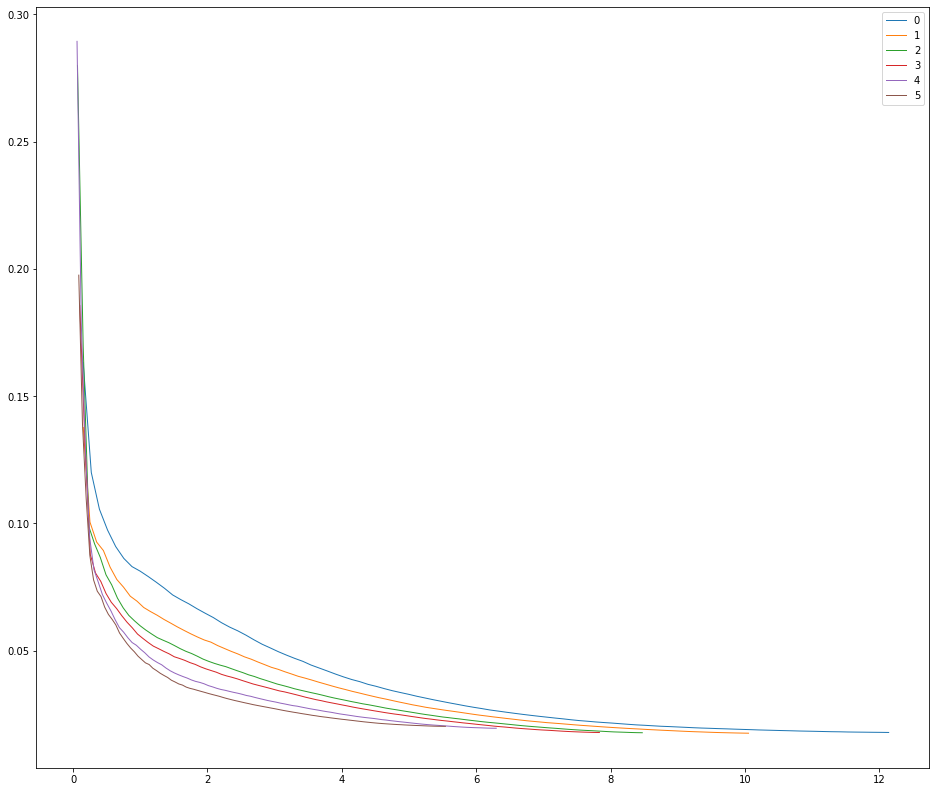

In [173]:

fileName = [[] for i in range((Angles))]
dfs = []
numpydf = []
position = []
distance = []
for i in range(Angles):
    prefix1 = 'constant_volume_200/build-constant_volume/LXe_200_gram_2_nt_'  
    i=i
    csv ='.csv'
    
    fileName[i].append(f'{prefix1}{i}{csv}')
    dfs.append(pd.read_csv(fileName[i][0], sep=',',header=None, skiprows=range(0,10),
                           names=('Energy Deposited', 'SiPM Hits', 'Photons',
                                 'x_pos','y_pos','z_pos')))  
    dfs[i]['LCE']=dfs[i]['SiPM Hits']/dfs[i]['Photons']
    dfs[i]['log(LCE)']=log(dfs[i]['SiPM Hits']/dfs[i]['Photons'])
    numpydf.append(dfs[i].to_numpy())
    position.append(numpydf[i][:,3:6])
    position[i][:,2]=position[i][:,2]-min(position[i][:,2])
    position[i]= position[i]/25.4
    distance.append(sqrt(sum(position[i]**2,axis=1)))
    dfs[i]['z_pos'] = position[i][:,2].tolist()
    dfs[i]['y_pos'] = position[i][:,1].tolist()
    dfs[i]['x_pos'] = position[i][:,0].tolist()
    dfs[i]['Distance'] = distance[i].tolist()
    
energy_deposit_threshold = 0.0
photon_threshold = 0
SiPM_hit_threshold = 0
LCE_threshold = 0
distance_threshold =  0 #inch
for i in range(len(dfs)): 
    dfs[i] = dfs[i][dfs[i]['Energy Deposited']>=energy_deposit_threshold]
    dfs[i] = dfs[i][dfs[i]['Photons']>=photon_threshold]
    dfs[i] = dfs[i][dfs[i]['LCE']>=LCE_threshold]
    dfs[i] = dfs[i][dfs[i]['SiPM Hits']>=SiPM_hit_threshold]
    dfs[i] = dfs[i][dfs[i]['Distance']>=distance_threshold]    
bins = 100
mins = np.zeros((Angles))
maxs = np.zeros((Angles))
bes = np.zeros((Angles,bins+1))
bcs__ = np.zeros((Angles,bins))
for i in range(Angles):
    mins[i]= np.min(distance[i])
    maxs[i]= np.max(distance[i])
    bes[i,:] = np.linspace(mins[i],maxs[i],bins+1)
    bcs__[i,:] = bes[i,:-1] + np.diff(bes[i,:]) / 2.

average__ = np.zeros((Angles,bins))
for j in range(Angles):
    arraY = distance[j]
    for i in range(bins):
        msk = arraY>=bes[j,i] 
        mask = arraY<bes[j,i+1]
        mk = msk = mask
        average__[j,i] = dfs[j]['LCE'][mk].mean()
plt.figure(figsize=(16,14))
for i in range(Angles):    
    plot(bcs__[i],average__[i],label='{}'.format(i),lw=1)
legend()   
show()    

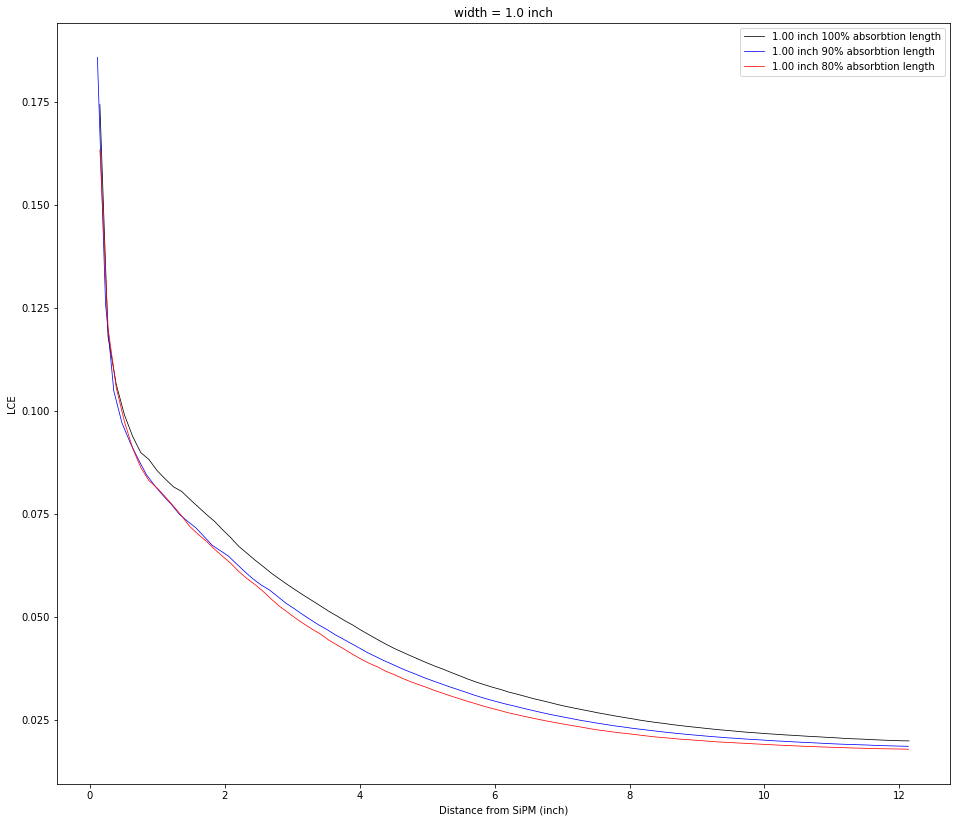

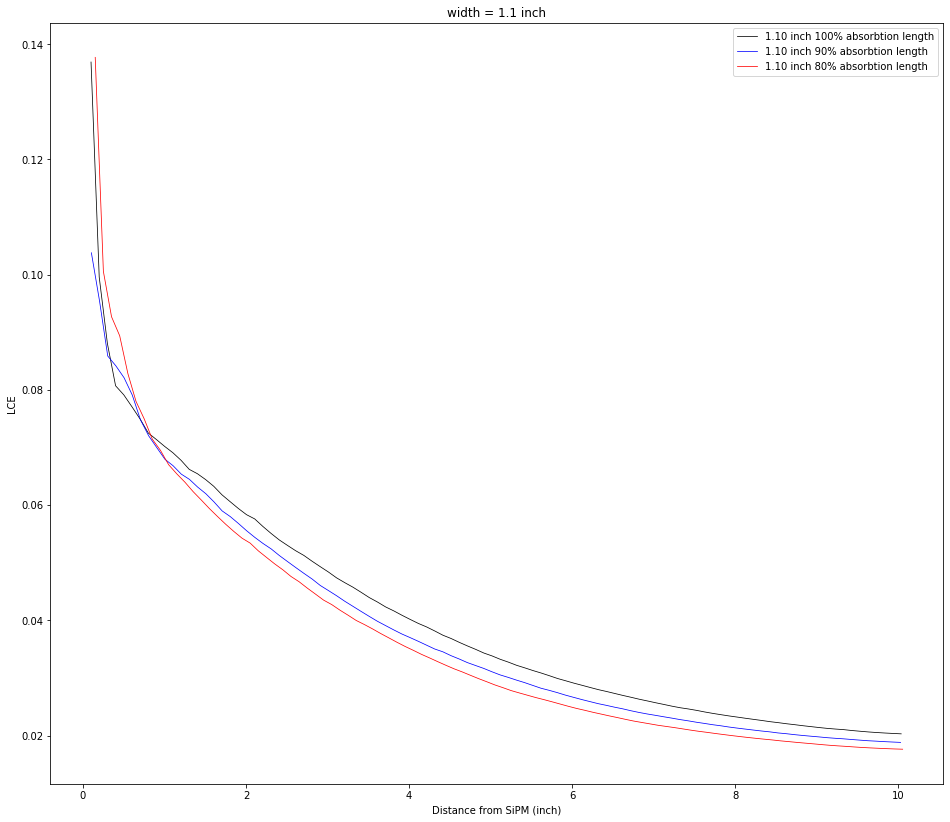

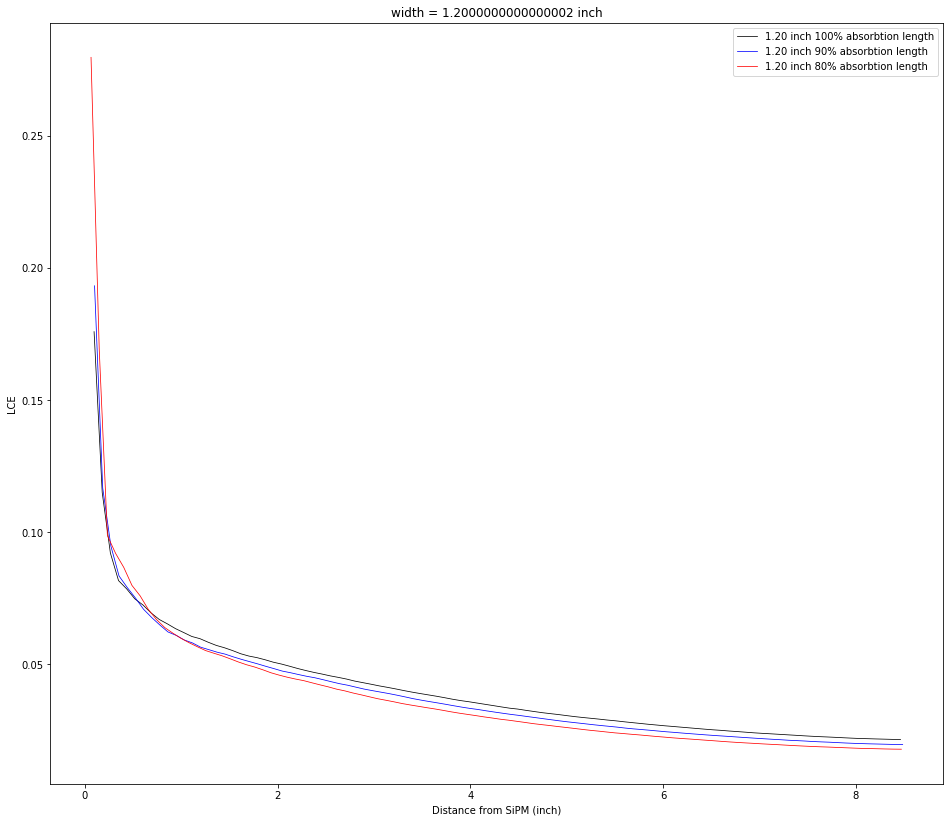

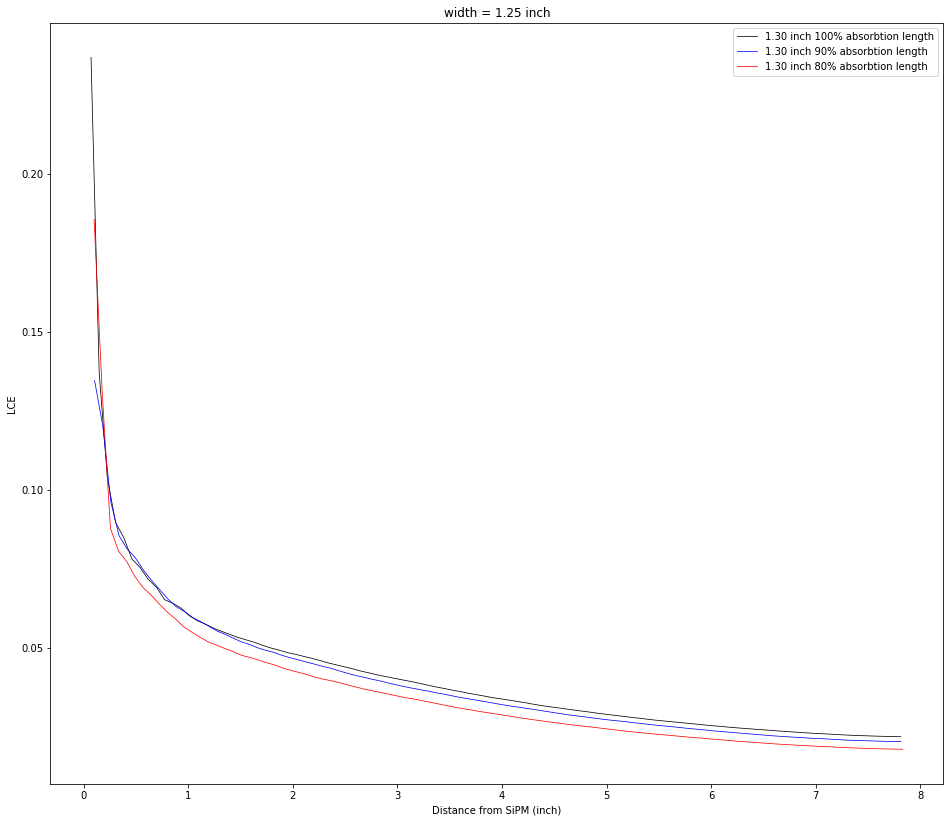

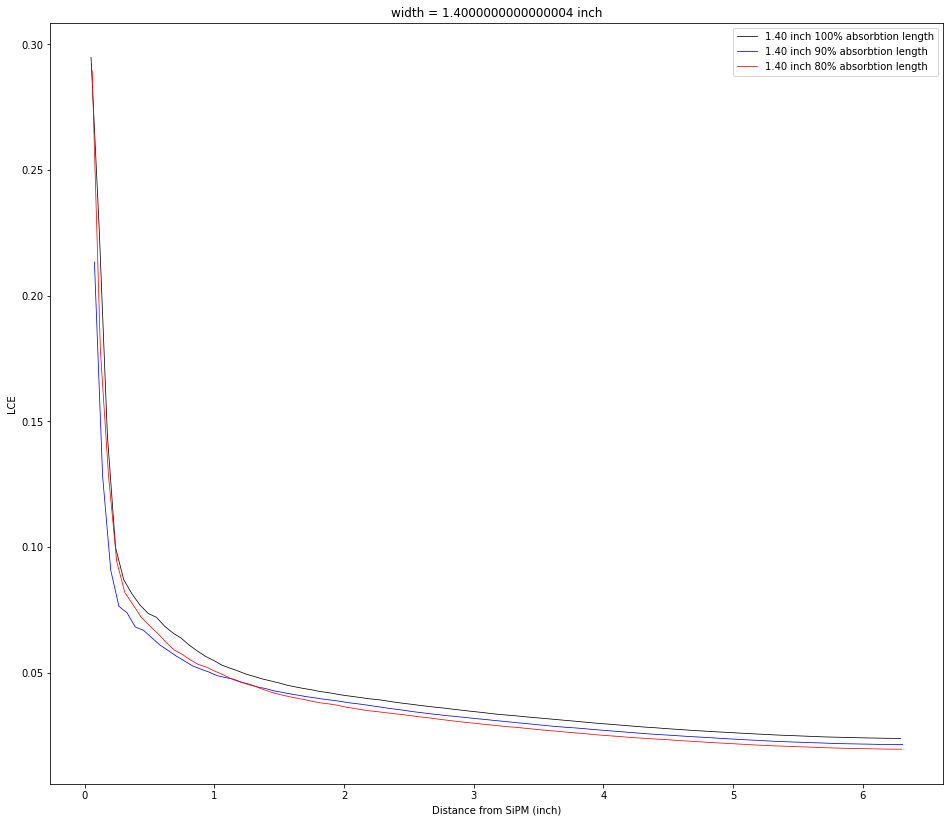

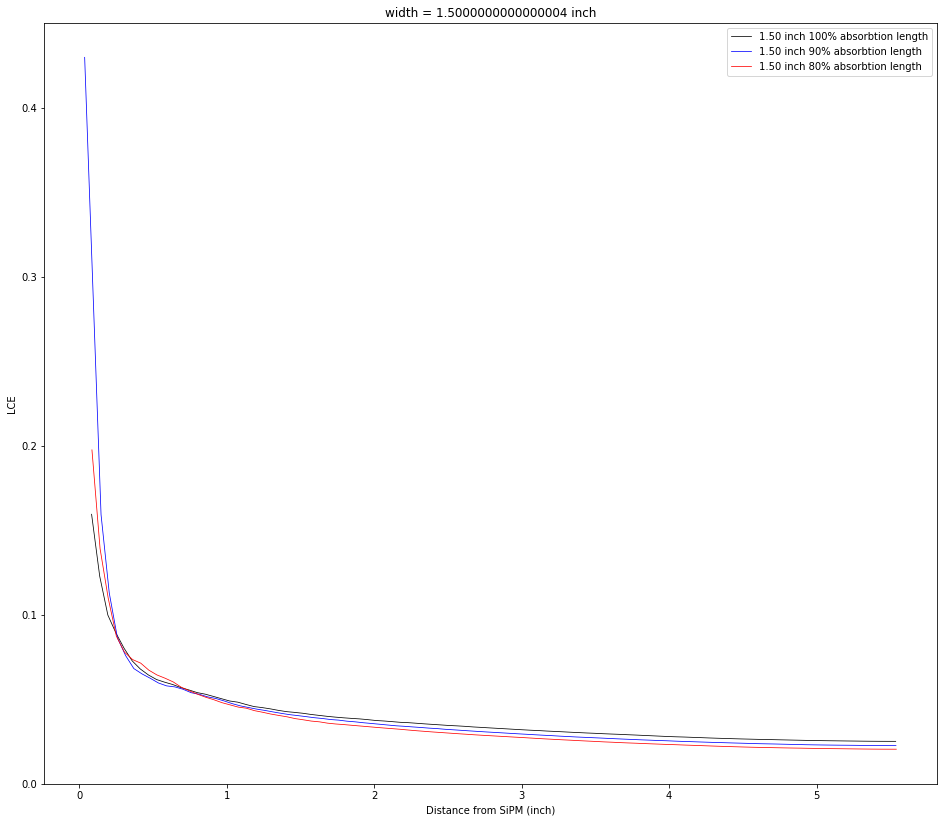

In [174]:

for i in range(0,Angles):
    plt.figure(figsize=(16,14))
    plt.title('width = {} inch'.format(width[i]))
    plt.xlabel('Distance from SiPM (inch)')
    plt.ylabel('LCE')
    plot(bcs[i],average[i],label='{:.2f} inch 100% absorbtion length'.format(1+i/10),lw=0.75, c='k')
    plot(bcs_[i],average_[i],label='{:.2f} inch 90% absorbtion length'.format(1+i/10),lw=0.75,c='b')    
    plot(bcs__[i],average__[i],label='{:.2f} inch 80% absorbtion length'.format(1+i/10),lw=0.75, c='r')
    legend()   
    show()    